In [1]:
# Imports
import numpy as np
import pandas as pd

In [2]:
# Improve performance and memory usage
values = pd.Series(['apple', 'orange', 'apple', 'apple'] * 2)
print(values, '\n')  # Series contains duplicate sequences of data
print(pd.unique(values), '\n')       # use '.unique()' to return unique data
print(pd.value_counts(values), '\n') # use '.value_counts' to find duplicates

# Create a categorical or dictionary-encoded representation
values = pd.Series([0, 1, 0, 0] * 2) # Define category codes as an integer list
# Specify the categories, dictionary or levels of data
dim = pd.Series(['apple', 'orange']) 
print(values, '\n')
print(dim, '\n')
print(dim.take(values)) # recreate original data using '.take()'

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object 

['apple' 'orange'] 

apple     6
orange    2
dtype: int64 

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64 

0     apple
1    orange
dtype: object 

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object


In [3]:
# Working with Categroical data using pandas 'Categorical' type
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
                   'basked_id': np.arange(N),
                   'count': np.random.randint(3, 15, size = N),
                   'weight': np.random.uniform(0, 4, size = N)},
                   columns = ['basked_id', 'fruit', 'count', 'weight'])
print(df, '\n')

fruit_cat = df['fruit'].astype('category') # Convert 'fruit' to categorical
print(fruit_cat, '\n')

c = fruit_cat.values
print(type(c))       # fruit_cat is a Series of objects of class 'Categorical'
print(c.categories)  # categories attribute
print(c.codes, '\n') # codes attribute

df['fruit'] = df['fruit'].astype('category') # convert DF column to categorical
print(df.fruit, '\n')

# create Categorical array from  list sequence
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bat'])
print(my_categories, '\n')

# create Categorical array from another source
categories = ['foo', 'bar', 'baz'] # Categories
codes = [0, 1, 2, 0, 0, 1]         # Category codes
my_cats_2 = pd.Categorical.from_codes(codes, categories)
print(my_cats_2, '\n')
# Specify ordering. i.e. 'foo' precedes 'bar' precedes 'baz'
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered = True)
print(ordered_cat, '\n')
print(my_cats_2.as_ordered()) # convert unordered categorical to ordered

   basked_id   fruit  count    weight
0          0   apple      5  3.843377
1          1  orange      7  1.021864
2          2   apple      7  2.600938
3          3   apple     11  3.028688
4          4   apple      7  0.471029
5          5  orange     10  3.496317
6          6   apple      4  3.984946
7          7   apple      9  2.301396 

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange] 

<class 'pandas.core.arrays.categorical.Categorical'>
Index(['apple', 'orange'], dtype='object')
[0 1 0 0 0 1 0 0] 

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange] 

[foo, bar, baz, foo, bat]
Categories (4, object): [bar, bat, baz, foo] 

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz] 

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo 

In [4]:
# Arithmetical operations on Categoricals
np.random.seed(12345)
draws = np.random.randn(1000)
print(draws[:5], '\n')

bins = pd.qcut(draws, 4) # Bin data in quarters
print(bins, '\n')

bins = pd.qcut(draws, 4, labels = ['Q1', 'Q2', 'Q3', 'Q4']) # Bin with labels
print(bins[:10])
print(bins.codes[:10], '\n')

bins = pd.Series(bins, name = 'quartile')
results = (pd.Series(draws) # Extract some statistics
           .groupby(bins).agg(['count', 'min', 'max']).reset_index())
print(results, '\n')
print(results['quartile']) # Column now contains ording information from 'bins'

[-0.20470766  0.47894334 -0.51943872 -0.5557303   1.96578057] 

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]] 

[Q2, Q3, Q2, Q2, Q4, Q4, Q3, Q3, Q4, Q4]
Categories (4, object): [Q1 < Q2 < Q3 < Q4]
[1 2 1 1 3 3 2 2 3 3] 

  quartile  count       min       max
0       Q1    250 -2.949343 -0.685484
1       Q2    250 -0.683066 -0.010115
2       Q3    250 -0.010032  0.628894
3       Q4    250  0.634238  3.927528 

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]


In [5]:
# Categoricals performance benefits
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))
categories = labels.astype('category') # Convert labels to categoricals

# Labels uses more memory than categoricals 
print(labels.memory_usage())
print(categories.memory_usage())
%time _ = labels.astype('category') # Conversion performance hit

80000080
10000272
Wall time: 534 ms


In [6]:
# Categorical Methods provided by '.cat'
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
print(cat_s, '\n')
print(cat_s.cat.codes)            # '.cat.codes' method
print(cat_s.cat.categories, '\n') # '.cat.categories' method
print(cat_s.value_counts(), '\n') # List of value occurances 

# extend categories using '.cat.set_categories()' method
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories) 
print(cat_s2, '\n')
print(cat_s2.value_counts(), '\n') # Category seen as result of .value_counts()

cat_s3 = cat_s[cat_s.isin(['a', 'b'])] 
print(cat_s3, '\n')           # Categories 'c' & 'd' are unused after operation
print(cat_s3.cat.remove_unused_categories(), '\n') # Trim unused categories

print(pd.get_dummies(cat_s)) # Generating dummy variables i.e. one-hot-encoding

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d] 

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8
Index(['a', 'b', 'c', 'd'], dtype='object') 

d    2
c    2
b    2
a    2
dtype: int64 

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e] 

d    2
c    2
b    2
a    2
e    0
dtype: int64 

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d] 

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b] 

   a  b  c  d
0  1  0  0  0
1  0  1  0  0
2  0  0  1  0
3  0  0  0  1
4  1  0  0  0
5  0  1  0  0
6  0  0  1  0
7  0  0  0  1


<center>Categorical Methods</center>

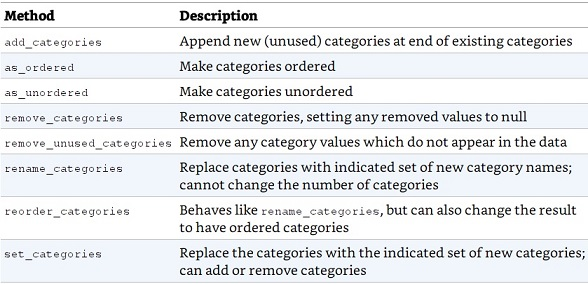

In [7]:
# Advanced 'groupby'
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4, 'value': np.arange(12.)})
print(df, '\n')

g = df.groupby('key').value # Group using 'key'  
print(g.mean(), '\n')       # and compute mean
# create series, in same shape of 'value', with values replaced by grouped mean
print(g.transform(lambda x: x.mean()), '\n') # using '.transform()'
# print(g.transform('mean')) # Same result using an aggregation function alias

# '.transform()' works with functions that return a Series
print(g.transform(lambda x: x * 2), '\n')
# Example: Compute ranks in descending order for each group
print(g.transform(lambda x: x.rank(ascending = False)), '\n')

   key  value
0    a    0.0
1    b    1.0
2    c    2.0
3    a    3.0
4    b    4.0
5    c    5.0
6    a    6.0
7    b    7.0
8    c    8.0
9    a    9.0
10   b   10.0
11   c   11.0 

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64 

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64 

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64 

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64 



In [8]:
# Normalize group transformation function
def normalize(x: pd.Series) -> pd.Series:
    return (x - x.mean()) / x.std()

print(g.transform(normalize)) # could also use g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64


In [9]:
# Unwrapped Group Operations

# Use an aggregation function alias with additional performance benefits
print(g.transform('mean'), '\n')    # Perform unwrapped group operation
 
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
print(normalized, '\n')

# '.resample()' group operation
N = 15
times = pd.date_range('2017-05-20 00:00', freq = '1min', periods = N)
df = pd.DataFrame({'time': times, 'value': np.arange(N)})
print(df, '\n')
# Index by 'time' and resample
print(df.set_index('time').resample('5min').count(), '\n') 

df2 = pd.DataFrame({'time': times.repeat(3), 
                    'key': np.tile(['a', 'b', 'c'], N),
                    'value': np.arange(N * 3.)})
print(df2[:7], '\n')
# To resample, use '.Grouper()' object on this more complex example
time_key = pd.Grouper(freq = '5min') 
# set time index, group by 'key' and aggregate using sum()
resampled = (df2.set_index('time').groupby(['key', time_key]).sum())
print(resampled, '\n')
print(resampled.reset_index()) # Restore index

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64 

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64 

                  time  value
0  2017-05-20 00:00:00      0
1  2017-05-20 00:01:00      1
2  2017-05-20 00:02:00      2
3  2017-05-20 00:03:00      3
4  2017-05-20 00:04:00      4
5  2017-05-20 00:05:00      5
6  2017-05-20 00:06:00      6
7  2017-05-20 00:07:00      7
8  2017-05-20 00:08:00      8
9  2017-05-20 00:09:00      9
10 2017-05-20 00:10:00     10
11 2017-05-20 00:11:00     11
12 2017-05-20 00:12:00     12
13 2017-05-20 00:13:00     13
14 2017-05-20 00:14:00     14 

                     value
time                      
2017-05-20 00:00:00      5
2017-05-20 00:05:00      5
2017-05-20 00:10:00      5 

                 time

## These examples are for instructive purposes only 

In [ ]:
# Method Chaining: Optimize use of temporary variables

df = load_data() # df is a temporary variable
df2 = df[df['col2'] < 0]
df2['coll_demeaned'] = df2['coll'] - df2['coll'].mean()
result = df2.groupby('key').coll_demeaned.std()

df2 = df.copy() # Non functional assignment
df2['k'] = v

df2 = df.assign(k = v) # functional equivalent using '.assign()'

result = (df2.assign(col1_demeaned = df2.col1 - df2.col2.mean())
          .groupby('key').col1_demeaned.std()) # assign enables method chaining

# using temporary variables with method chaining by using callables
df = load_data()
df2 = df[df['col2'] < 0]
# rewrite using a callable to enable chaining
df = (load_data() [lambdax: x['col2'] < 0]) # lambda function is the callable

result = (load_data()[lambda x: x.col2 < 0] # Entire method chained sequence
          .assign(col1_demeaned = lambda x: x.col1 - x.col1.mean())
          .groupby('key').col1_demeaned.std())

In [ ]:
# Pipe Method

a = f(df, arg1 = v1)
b = g(a, v2, arg3 = v3)
c = h(b, arg4 = v4)

# use '.pipe()' to rewrite above
result = (df.pipe(f, arg1 = v1).pipe(g, v2, arg3 = v3).pipe(h, arg4 = v4))
# note f(df) and df.pipe(f) are equivalent expressions

# use pipe to convert sequences of operations into reusable functions
g = df.groupby(['key1', 'key2'])
df['col1'] = df['col1'] - g.transorm('mean')

# Function to demean more than one column
def group_demean(df, by, cols):
    result = df.copy()
    g = df.groupby(by)
    for c in cols:
        result[c] = df[c] - g[c].transform('mean')
    return result

# Now you can demean and change the group keys by chaining the operations
result = (df[df.col1 < 0].pipe(group_demean, ['key1', 'key2'], ['col1']))